In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
#Load Files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read city_data file and store it as a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
sum(city_data_df["type"]=="Urban")

66

In [8]:
sum(city_data_df["type"]=="Rural")

18

In [9]:
sum(city_data_df["type"]=="Suburban")

36

In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Combine the data into single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Rename the columns in the merged dataframe.
pyber_data_df.rename(columns={'city': 'City', 'date':'Date', 'fare':'Fare', 'ride_id': 'Ride Id',
                              'driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Rename the columns in the merged dataframe.
city_data_df.rename(columns={'city': 'City','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)

city_data_df.head()

,City,No. Drivers,City Type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [16]:
total_rides_types = pyber_data_df.groupby(["City Type"]).count()["Ride Id"]
total_drivers_types = city_data_df.groupby(["City Type"]).sum()["No. Drivers"]

In [17]:
pyber_data_df = pyber_data_df.set_index(["Date"])
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [18]:
#In place of the copy method
fares_df = pyber_data_df.loc[:,["City Type","Fare"]]
fares_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [19]:
fares_df = fares_df.reset_index() 
fares_df

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [20]:
fares_df['Date']=pd.to_datetime(fares_df['Date'], format='%Y-%m-%d %H:%M:%S')
fares_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2375 non-null   datetime64[ns]
 1   City Type  2375 non-null   object        
 2   Fare       2375 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.8+ KB


In [21]:
sum_fares_df = fares_df.groupby(['Date','City Type']).sum()
sum_fares_df

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [22]:
# Create the Urban DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["City Type"] == "Urban"]
urban_cities_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [23]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["City Type"] == "Suburban"]
suburban_cities_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-27 03:08:01,Barronchester,27.79,6653622887913,11,Suburban
2019-04-07 19:44:19,East Kentstad,18.75,6575961095852,20,Suburban
2019-01-17 21:33:35,Lake Omar,21.71,966911700371,22,Suburban
2019-02-27 17:38:39,Myersshire,17.10,5706770909868,19,Suburban
2019-04-19 01:06:59,West Hannah,37.78,2273047151891,12,Suburban
...,...,...,...,...,...
2019-03-02 17:06:03,West Hannah,13.92,7388937249208,12,Suburban
2019-04-03 03:27:45,Lake Robertside,12.76,1301757653884,4,Suburban
2019-01-10 06:49:58,Colemanland,27.70,8704067171414,23,Suburban


In [24]:
rural_cities_df = pyber_data_df[pyber_data_df["City Type"] == "Rural"]
rural_cities_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-04-13 11:13:31,Randallchester,43.22,1076079536213,9,Rural
2019-02-02 14:54:00,North Holly,12.42,1985256326182,8,Rural
2019-03-27 18:27:34,Michaelberg,54.85,4421836952718,6,Rural
2019-02-23 21:12:24,Lake Latoyabury,47.90,3269652929887,2,Rural
2019-05-06 08:57:56,Lake Latoyabury,51.80,4018025271936,2,Rural


In [25]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["City"]).count()["Ride Id"]
urban_ride_count.head()

City
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: Ride Id, dtype: int64

In [26]:
# Create the suburban & rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["City"]).count()["Ride Id"]
suburban_ride_count.head()

City
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: Ride Id, dtype: int64

In [27]:
rural_ride_count = rural_cities_df.groupby(["City"]).count()["Ride Id"]
rural_ride_count.head()

City
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: Ride Id, dtype: int64

In [28]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["City"]).mean()["Fare"]
urban_avg_fare.head()

City
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: Fare, dtype: float64

In [29]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["City"]).mean()["Fare"]
suburban_avg_fare.head()

City
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: Fare, dtype: float64

In [30]:
rural_avg_fare = rural_cities_df.groupby(["City"]).mean()["Fare"]
rural_avg_fare.head()

City
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: Fare, dtype: float64

In [31]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["City Type"]).count()["No. Drivers"]
urban_driver_count.head()

City Type
Urban    1625
Name: No. Drivers, dtype: int64

In [32]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["City Type"]).count()["No. Drivers"]
suburban_driver_count.head()

City Type
Suburban    625
Name: No. Drivers, dtype: int64

In [33]:
rural_driver_count = rural_cities_df.groupby(["City Type"]).count()["No. Drivers"]
rural_driver_count.head()

City Type
Rural    125
Name: No. Drivers, dtype: int64

In [34]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [35]:
round(urban_ride_count.median())

24

In [36]:
# Calculate the mode of the ride count for the urban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [37]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [38]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["Fare"]
urban_fares.head()

Date
2019-01-14 10:14:22    13.83
2019-03-04 18:24:09    30.24
2019-02-24 04:29:00    33.44
2019-02-10 23:22:03    23.44
2019-03-06 04:28:35    34.58
Name: Fare, dtype: float64

In [39]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [40]:
# Get the fares for the urban cities.
suburban_fares = suburban_cities_df["Fare"]
suburban_fares.head()

Date
2019-01-27 03:08:01    27.79
2019-04-07 19:44:19    18.75
2019-01-17 21:33:35    21.71
2019-02-27 17:38:39    17.10
2019-04-19 01:06:59    37.78
Name: Fare, dtype: float64

In [41]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [42]:
# Get the fares for the urban cities.
rural_fares = rural_cities_df["Fare"]
rural_fares.head()

Date
2019-04-13 11:13:31    43.22
2019-02-02 14:54:00    12.42
2019-03-27 18:27:34    54.85
2019-02-23 21:12:24    47.90
2019-05-06 08:57:56    51.80
Name: Fare, dtype: float64

In [43]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [44]:
# Get the driver counts from the urban cities.
urban_drivers = urban_cities_df['No. Drivers']
urban_drivers.head()

Date
2019-01-14 10:14:22     5
2019-03-04 18:24:09    72
2019-02-24 04:29:00    57
2019-02-10 23:22:03    34
2019-03-06 04:28:35    46
Name: No. Drivers, dtype: int64

In [45]:
# Get the driver count data from the urban cities.
suburban_drivers = suburban_cities_df['No. Drivers']
suburban_drivers.head()

Date
2019-01-27 03:08:01    11
2019-04-07 19:44:19    20
2019-01-17 21:33:35    22
2019-02-27 17:38:39    19
2019-04-19 01:06:59    12
Name: No. Drivers, dtype: int64

In [46]:
# Get the driver count data from the urban cities.
rural_drivers = rural_cities_df['No. Drivers']
rural_drivers.head()

Date
2019-04-13 11:13:31    9
2019-02-02 14:54:00    8
2019-03-27 18:27:34    6
2019-02-23 21:12:24    2
2019-05-06 08:57:56    2
Name: No. Drivers, dtype: int64

In [47]:
urban_drivers.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: No. Drivers, dtype: float64

In [48]:
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: No. Drivers, dtype: float64

In [49]:
rural_drivers.describe()

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: No. Drivers, dtype: float64

In [50]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


In [51]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["City Type"]).sum()["Fare"]
sum_fares_by_type

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [52]:
# Get the sum of all the fares.
total_fares = pyber_data_df["Fare"].sum()
total_fares

63538.64

In [53]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

City Type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: Fare, dtype: float64

In [54]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["City Type"]).sum()["Fare"] / pyber_data_df["Fare"].sum()
type_percents

City Type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: Fare, dtype: float64

In [55]:
pyber_data_df["No. Drivers"].sum()

68709

In [56]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["City Type"]).count()["Ride Id"] / pyber_data_df["Ride Id"].count()
ride_percents

City Type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: Ride Id, dtype: float64

In [57]:
total_rides = pyber_data_df.groupby(["City Type"]).count()["Ride Id"]

total_drivers = city_data_df.groupby(['City Type'])['No. Drivers'].sum()

total_fares = pyber_data_df.groupby(["City Type"]).sum()["Fare"]

average_fare_per_ride = total_fares / total_rides

average_fare_per_driver = total_fares / total_drivers

In [58]:
# Assemble into DataFrame.
final_summary_df = pd.DataFrame({
          "Total Rides" : total_rides,
          "Total Drivers": total_drivers,
          "Total Fares": total_fares,
          "Average Fare per Ride": average_fare_per_ride,
          "Average Fare per Driver": average_fare_per_driver})

final_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [60]:
#del final_summary_df.index.name

In [61]:

final_summary_df["Total Rides"] = final_summary_df["Total Rides"].astype(float)

final_summary_df["Total Drivers"] = final_summary_df["Total Drivers"].astype(float)

final_summary_df["Total Fares"] = final_summary_df["Total Fares"].astype(float)

final_summary_df["Average Fare per Ride"] = final_summary_df["Average Fare per Ride"].astype(float)

final_summary_df["Average Fare per Driver"] = final_summary_df["Average Fare per Driver"].astype(float)

final_summary_df.dtypes

Total Rides                float64
Total Drivers              float64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [62]:
final_summary_df["Total Rides"] = final_summary_df["Total Rides"].map("{:.0f}".format)

final_summary_df["Total Drivers"] = final_summary_df["Total Drivers"].map("{:.0f}".format)

final_summary_df["Total Fares"] = final_summary_df["Total Fares"].map("{:.0f}".format)

final_summary_df["Average Fare per Ride"] = final_summary_df["Average Fare per Ride"].map("${:.2f}".format)

final_summary_df["Average Fare per Driver"] = final_summary_df["Average Fare per Driver"].map("${:.2f}".format)

final_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
City Type,,,,,
Rural,125,78,4328,$34.62,$55.49
Suburban,625,490,19356,$30.97,$39.50
Urban,1625,2405,39854,$24.53,$16.57


In [63]:
pyber_data_df = pd.pivot_table(pyber_data_df, values ='Fare', index=['Date'], columns = ['City Type'])
pyber_data_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [69]:
date_df = pyber_data_df.loc['2019-01-01':'2019-04-29']
date_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [70]:
date_df.index = pd.to_datetime(date_df.index)
date_df.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-04-28 09:25:03', '2019-04-28 10:54:14',
               '2019-04-28 11:40:49', '2019-04-28 11:49:26',
               '2019-04-28 12:48:34', '2019-04-28 14:28:36',
               '2019-04-28 16:29:16', '2019-04-28 17:26:52',
               '2019-04-28 17:38:09', '2019-04-28 19:35:03'],
              dtype='datetime64[ns]', name='Date', length=2196, freq=None)

In [71]:
weekly_bins_df = date_df.resample('W').sum()
weekly_bins_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


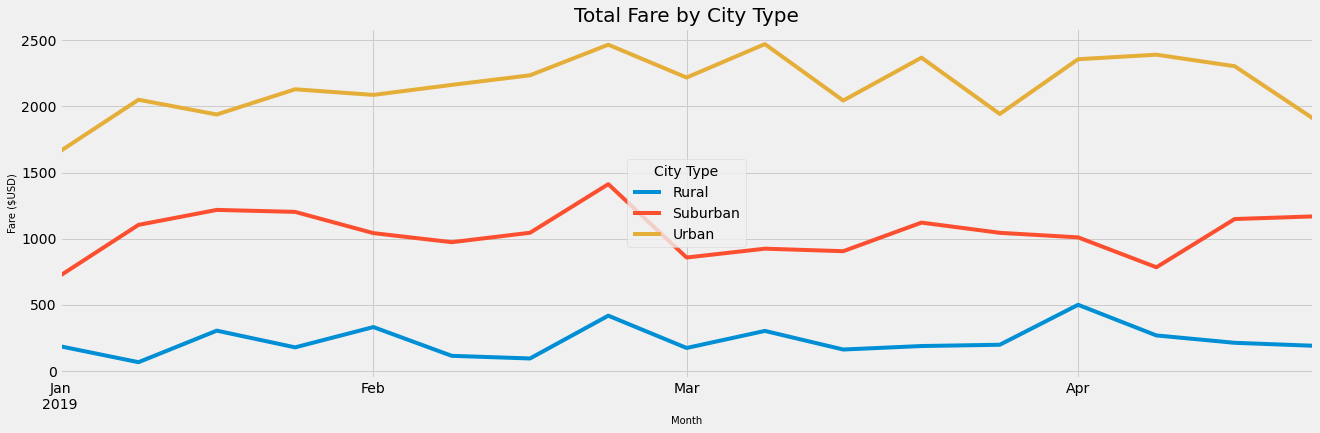

In [67]:

# Create Plot
from matplotlib.pyplot import style
style.use('fivethirtyeight')
lineplot = weekly_bins_df.plot(figsize=(20,6))
plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=10)
plt.xlabel("Month", fontsize=10)
# Save the Figure
plt.savefig("challengepart2.png")
plt.show()